In [8]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

MODEL = models.load_model('potatoes.h5')
CLASS_NAMES = ["Early Blight", "Late Blight", "Healthy"]

ValueError: No model config found in the file at potatoes.h5.

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PLantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000, seed = 2):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = seed)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    

In [5]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

actual label: Late Blight
predicted label: Late Blight


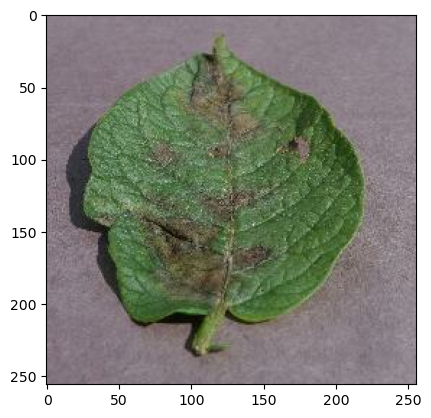

In [15]:
for image_batch, label_batch in test_ds.take(1):
    image = image_batch[0].numpy().astype('uint8')
    label = label_batch[0].numpy()
    
    predicted_batch = MODEL(image_batch)
    predicted_label = CLASS_NAMES[np.argmax(predicted_batch[0])]
    
    print("actual label:", CLASS_NAMES[label])
    print("predicted label:", predicted_label)
    plt.imshow(image)
    